In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#yubowei 05/25/2021
#solving the matrix
#input upper diagonal and y vector
def upper(upper, y):
    x = np.zeros(len(y))
    # start from the bottom
    for i in range(len(y)-1, -1, -1):
        temp = [upper[i][j] * x[j] for j in range(len(y)-1, i, -1)]
        x[i] = (y[i] - sum(temp))/upper[i][i]
    return x
# similarly. we can solve the lower diagonal
def lower(lower, y):
    x = np.zeros(len(y))
    for i in range(0, len(y)):
        temp = [lower[i][j] * x[j] for j in range(i)]
        x[i] = (y[i] - sum(temp))/lower[i][i]
    return x
# this is a void function
# input: tridiagonal matrix and zero matrixes
# output: Lower diagonal and upper diagonal 
def void(m, l, u):
    # for eaiser computation, here I used Natural Spline graph from https://zhuanlan.zhihu.com/p/62860859
    # basically, it adds an edge to the matrix 
    l[-1][-1] = 1
    u[0][0] = m[0][0]
    for i in range(len(m) - 1):
        l[i][i] = 1
        u[i][i+1] = m[i][i+1]
        l[i+1][i] = m[i+1][i]/u[i][i]
        u[i+1][i+1] = m[i+1][i+1] - l[i+1][i] * m[i][i+1]
        
# now solve the tridiagonal matrix Ax = y
# input tridiagonal matrix and y vector

def solve_tridiagonal(m, y):
    l = np.zeros((len(m),len(m)))
    u = np.zeros((len(m),len(m)))
    void(m,l,u)
    z = lower(l,y)
    x = upper(u,z)
    return x



In [41]:
# Test code
A = np.array([[5,1,0,0,0],
           [1,4,1,0,0],
           [0,2,4,1,0],
           [0,4,2,6,0],
           [0,0,1,2,4]])
b = np.array([4,2,4,4,5])
x = solve_tridiagonal(A,b)
np.dot(A,x)

array([4.       , 2.       , 4.       , 4.3575419, 5.8603352])

## Q2
Consider the boundary value problem:
$$
\begin{aligned}
-u^{\prime \prime}+\pi^{2} u &=2 \pi^{2} \sin (\pi x) \quad 0<x<1, \\
u(0) &=u(1)=0
\end{aligned}
$$

We can find a numerical approximation to the solution of this problem by employing the finite difference method. Use a uniform grid with $N-1$ interior nodes to obtain, by replacing the second derivative with a second order finite difference and neglecting the (truncation) error, the linear system:

$$
\frac{-v_{j-1}+2 v_{j}-v_{j+1}}{h^{2}}+\pi^{2} v_{j}=2 \pi^{2} \sin \left(\pi x_{j}\right) \text { for } j=1,2, \ldots, N-1
$$
$$
\text { where } \mathrm{h}=1 / \mathrm{N}, v_{j} \text { is the approximation to } u\left(x_{j}\right) \text { for } j=1,2, \ldots, N-1, \text { and } v_{0}=v_{N}=0 \text { . }
$$

In [63]:
# solve boundary value problem
# input: N 
# output: u
def bvp(N):
    x = np.linspace(0,1, N + 1) # the beam
    h = 1/N # grid size
    A = np.zeros((N-1,N-1))
    for i in range(N - 1):
        A[i][i] = 2+(h**2)*(np.pi**2) # diagonal form 
        if i > 0:
            A[i][i-1] = -1
            A[i-1][i] = -1
    m = 1/2/(h**2)/(np.pi**2)*A
    y = np.sin(np.pi*x)[1:-1]
    return solve_tridiagonal(m,y)

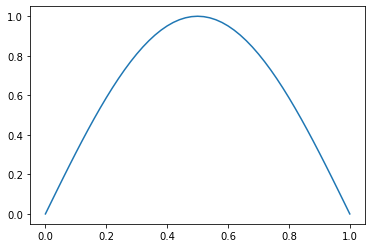

In [77]:
N1 = 50
X1 = np.linspace(0,1,N1+1)
u1 = bvp(N)
# u and X have different dimensions
plt.plot(X1,np.concatenate([[0],bvp(N1),[0]]))

In [83]:
# the error of your approximation in the 2-norm for N = 50
real_1 = np.sin(np.pi*np.linspace(0,1,N1 + 1))
error1 = np.linalg.norm(real_1-np.concatenate([[0],bvp(N1),[0]]))
error1

0.0008224940857883215

In [88]:
#for N = 100, by how much would you expect the error to decrease? 
N2 = 100
real_2 = np.sin(np.pi*np.linspace(0,1,N2 + 1))
error2 = np.linalg.norm(real_2-np.concatenate([[0],bvp(N2),[0]]))
error2/error1
# we expect that error would be 1/4 of the previous error, since O(h^2) and N doubled.

0.3535446696482984